In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 df= pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [88]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.shape

(284807, 31)

In [6]:
df = df.drop(columns = 'Time')
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [7]:
round(df['Class'].value_counts(normalize = True),4)*100

Class
0    99.83
1     0.17
Name: proportion, dtype: float64

In [8]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

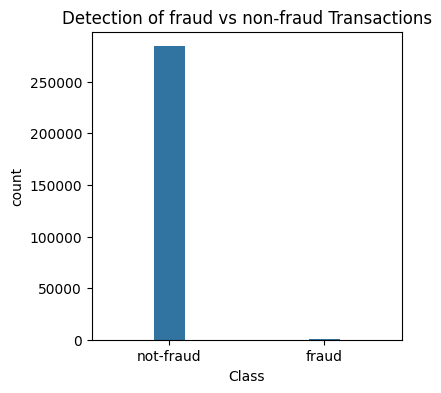

In [9]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'Class',data = df,width = 0.2)
plt.title('Detection of fraud vs non-fraud Transactions')
plt.xticks(ticks = [0,1], labels = ['not-fraud','fraud'])
plt.show()

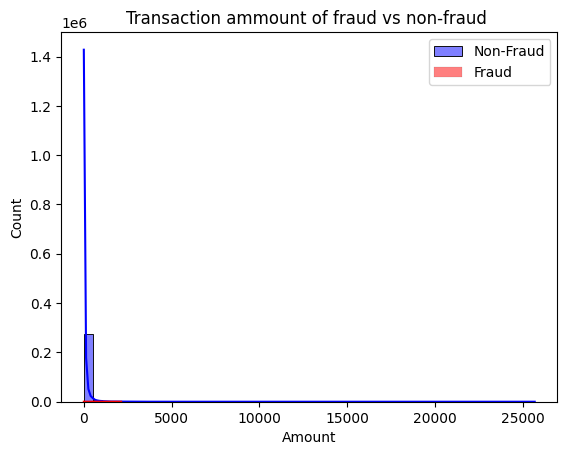

In [10]:
sns.histplot(x = df[df['Class']==0]['Amount'],bins = 50,color = 'Blue',label = 'Non-Fraud',kde = True)
sns.histplot(x = df[df['Class']==1]['Amount'],bins = 50,color = 'red',label = 'Fraud',kde = True)
plt.legend()
plt.title('Transaction ammount of fraud vs non-fraud ')
plt.show()

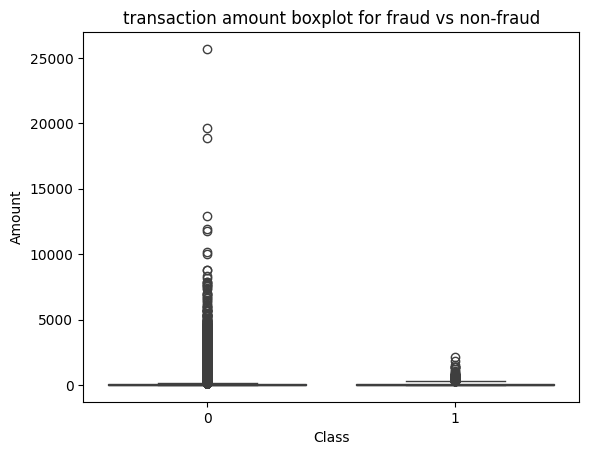

In [11]:
sns.boxplot(x = df['Class'],y = df['Amount'])
plt.title('transaction amount boxplot for fraud vs non-fraud')
plt.show()

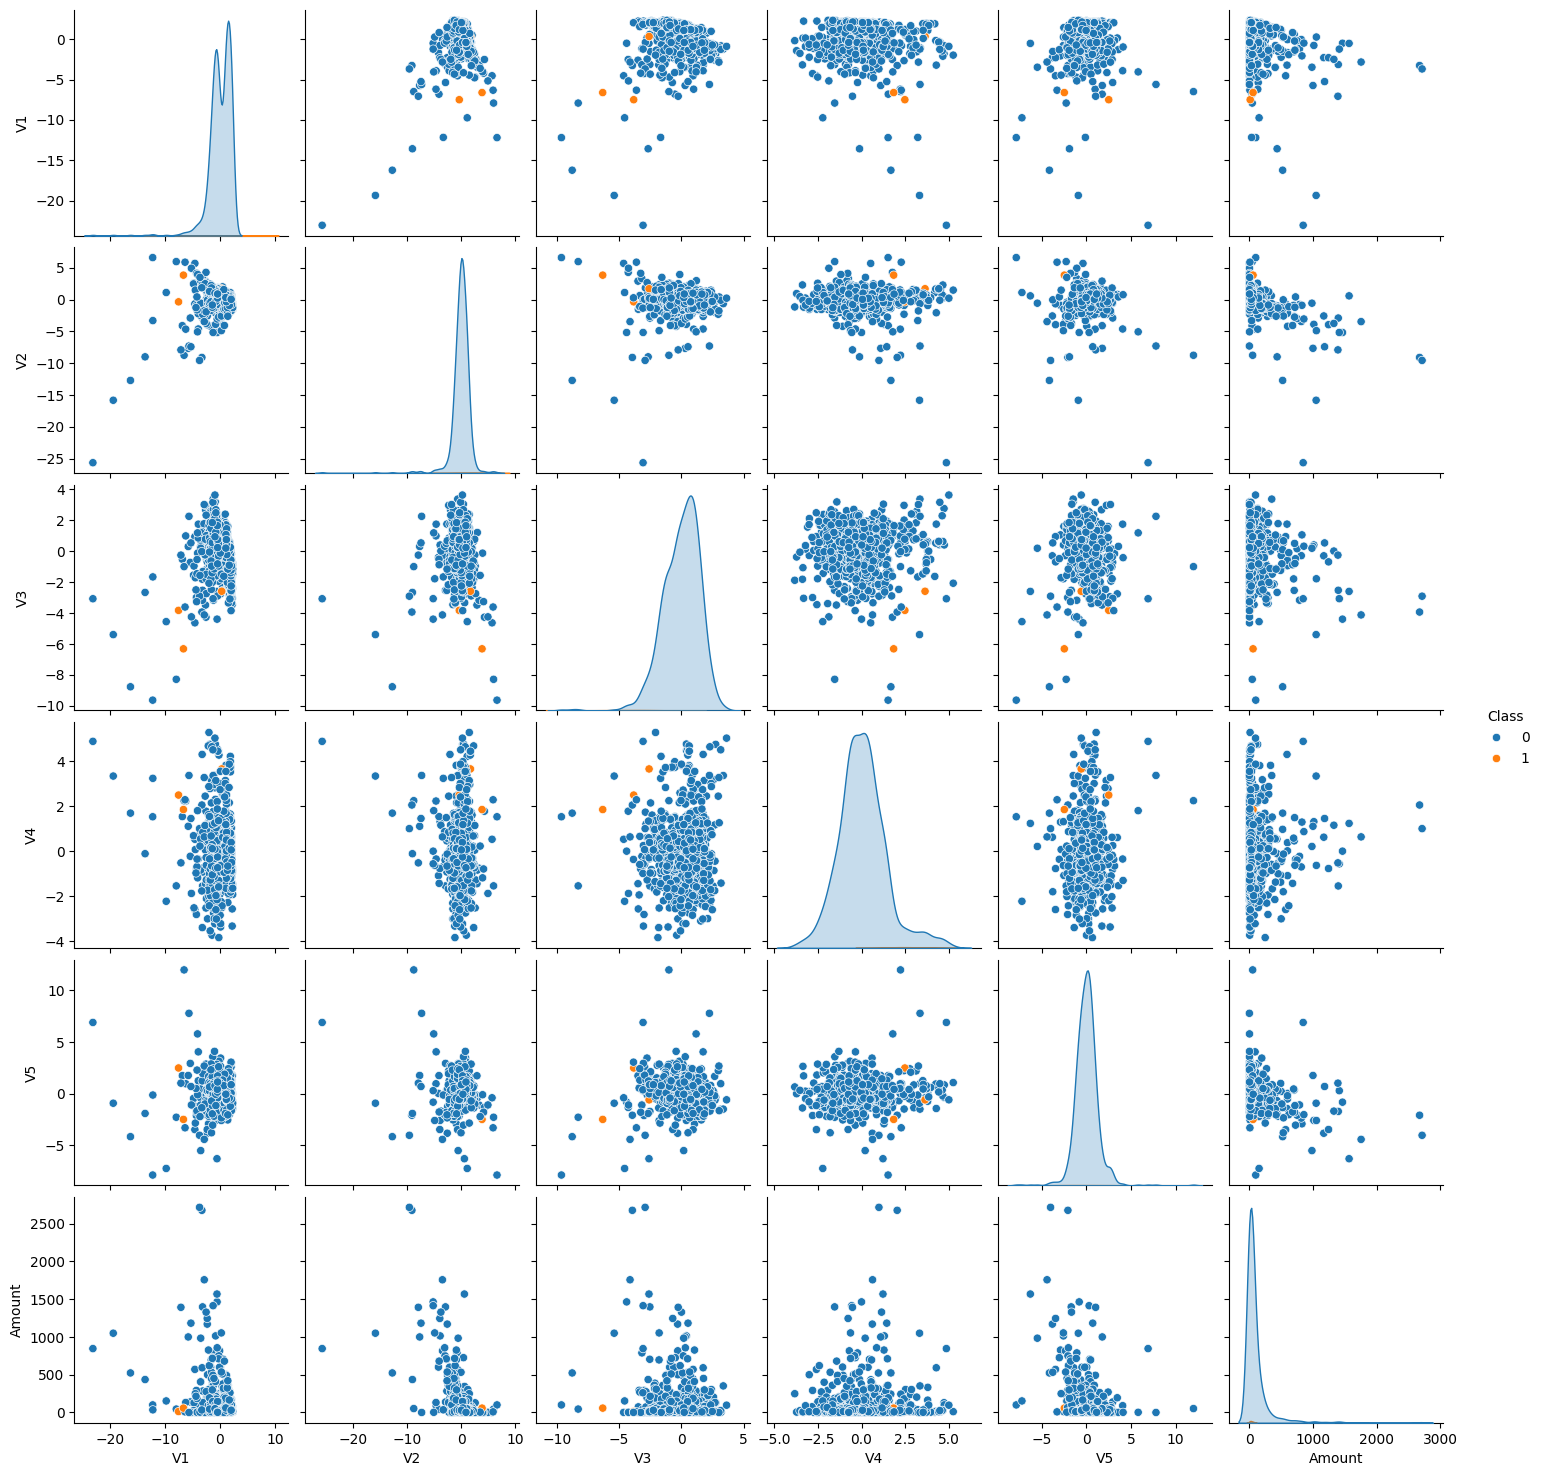

In [12]:
subset = df.sample(1000)
sns.pairplot(subset, hue = 'Class', vars = ['V1', 'V2', 'V3', 'V4', 'V5','Amount'])
plt.show()

In [13]:
x = df.iloc[:,:-1]
y = df['Class']

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [16]:
df[['Amount']].describe()

,Amount
count,284807.000000
mean,0.003439
std,0.009736
min,0.000000
25%,0.000218
50%,0.000856
75%,0.003004
max,1.000000


In [17]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [19]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression(max_iter = 1000)

In [22]:
fe = SequentialFeatureSelector(lr,k_features = 5, forward = True)
fe.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000),
                          k_features=(5, 5), scoring='accuracy')

In [23]:
fe.k_feature_names_

('V8', 'V9', 'V12', 'V14', 'V16')

In [24]:
(fe.k_score_*100)

99.9174877658057

In [25]:
selected_feature = list(fe.k_feature_names_)
print('selected_feature',selected_feature)

selected_feature ['V8', 'V9', 'V12', 'V14', 'V16']


In [26]:
x_train_selected = x_train[selected_feature]
x_test_selected = x_test[selected_feature]

In [27]:
smote = SMOTE(sampling_strategy = 0.5,random_state = 42)
x_train_smote,y_train_smote = smote.fit_resample(x_train_selected,y_train)

In [54]:
lr.fit(x_train_smote,y_train_smote)

LogisticRegression(max_iter=1000)

In [85]:
dfh = pd.DataFrame(y_train_smote)
dfh[dfh['Class']==1]

,Class
427,1
838,1
1174,1
1433,1
1477,1
...,...
341171,1
341172,1
341173,1
341174,1


In [86]:
DFD = pd.DataFrame(x_train_smote)
DFD.loc[427]

V8     0.117200
V9    -0.140927
V12   -0.329759
V14   -1.824839
V16    1.842347
Name: 427, dtype: float64

In [89]:
lr.predict([[0.117200,-0.140927,-0.329759,-1.824839,1.842347]])

C:\Users\divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [55]:
round(lr.score(x_test_selected,y_test)*100,3)

99.045

In [71]:
df1 = pd.DataFrame(y_train)
df1[df1['Class'] == 1]

,Class
276071,1
44556,1
251891,1
150677,1
149869,1
...,...
42674,1
33276,1
182992,1
154697,1


In [65]:
DF = pd.DataFrame(x_train_selected)
DF.loc[276071]

V8     0.117200
V9    -0.140927
V12   -0.329759
V14   -1.824839
V16    1.842347
Name: 276071, dtype: float64

In [67]:
# x_train_selected,y_train

In [68]:
lr.predict([[0.117200,-0.140927,-0.329759,-1.824839,1.842347]])

C:\Users\divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [32]:
df[df['Class']==1].T

,541,623,4920,6108,6329,6331,6334,6336,6338,6427,...,274382,274475,275992,276071,276864,279863,280143,280149,281144,281674
V1,-2.312227,-3.043541,-2.303350,-4.397974,1.234235,0.008430,0.026779,0.329594,0.316459,0.725646,...,-5.766879,-0.956390,-2.027135,2.091900,-1.374424,-1.927883,1.378559,-0.676143,-3.113832,1.991976
V2,1.951992,-3.157307,1.759247,1.358367,3.019740,4.137837,4.132464,3.712889,3.809076,2.300894,...,-8.402154,2.361594,-1.131890,-0.757459,2.793185,1.125653,1.289381,1.126366,0.585864,0.158476
V3,-1.609851,1.088463,-0.359745,-2.592844,-4.304597,-6.240697,-6.560600,-5.775935,-5.615159,-5.329976,...,0.056543,-3.171195,-1.135194,-1.192258,-4.346572,-4.518331,-5.004247,-2.213700,-5.399730,-2.583441
V4,3.997906,2.288644,2.330243,2.679787,4.732795,6.675732,6.348557,6.078266,6.047445,4.007683,...,6.950983,1.970759,1.086963,-0.755458,2.400731,1.749293,1.411850,0.468308,1.817092,0.408670
V5,-0.522188,1.359805,-0.821628,-1.128131,3.624201,0.768307,1.329666,1.667359,1.554026,-1.730411,...,9.880564,0.474761,-0.010547,-0.620324,-1.688433,-1.566487,0.442581,-1.120541,-0.840618,1.151147
V6,-1.426545,-1.064823,-0.075788,-1.706536,-1.357746,-3.353060,-2.513479,-2.420168,-2.651353,-1.732193,...,-5.773192,-1.902598,0.423797,-0.322077,0.111136,-2.010494,-1.326536,-0.003346,-2.943548,-0.096695
V7,-2.537387,0.325574,0.562320,-3.496197,1.713445,-1.631735,-1.689102,-0.812891,-0.746579,-3.968593,...,-5.748879,-0.055178,3.790880,-1.082511,-0.922038,-0.882850,-1.413170,-2.234739,-2.208002,0.223050
V8,1.391657,-0.067794,-0.399147,-0.248778,-0.496358,0.154612,0.303253,0.133080,0.055586,1.063728,...,0.721743,0.277831,-1.155595,0.117200,-2.149930,0.697211,0.248525,1.210158,1.058733,-0.068384
V9,-2.770089,-0.270953,-0.238253,-0.247768,-1.282858,-2.795892,-3.139409,-2.214311,-2.678679,-0.486097,...,-1.076274,-1.745854,-0.063434,-0.140927,-2.027474,-2.064945,-1.127396,-0.652250,-1.632333,0.577829
V10,-2.772272,-0.838587,-1.525412,-4.801637,-2.447469,-6.187891,-6.045468,-5.134454,-4.959493,-4.624985,...,2.688670,-2.516628,1.334414,0.249311,-4.390842,-5.587794,-3.232153,-3.463891,-5.245984,-0.888722
